in this notebook I am checking which and what are the runs used for the analysis

In [1]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
import yaml

from gammapy.data import DataStore

import datetime
import matplotlib.dates as mdates

In [2]:
hesseras = ['hess1', 'hess2', 'hess1u']
with open("/home/vault/caph/mppi062h/repositories/HESS_3Dbkg_syserror/general_config.yml", "r") as ymlfile:
    cfg = yaml.load(ymlfile, Loader=yaml.FullLoader)
conf=cfg['conf']

# before rebinning

In [ ]:
full_info = []
for hessera in hesseras:
    runlist= np.loadtxt(f'runlist_{hessera}.txt')
    
    basedir = f'$FITS_PROD/{hessera}/std_{conf}_fullEnclosure'
    ds = DataStore.from_dir(basedir, f'hdu-index-bg-latest-fov-radec.fits.gz', f'obs-index-bg-latest-fov-radec.fits.gz')
    obs_table = ds.obs_table

    mask = [True if obsid in runlist else False for obsid in obs_table['OBS_ID']]
    obs_table=obs_table[mask]
    
    full_info.append(obs_table)

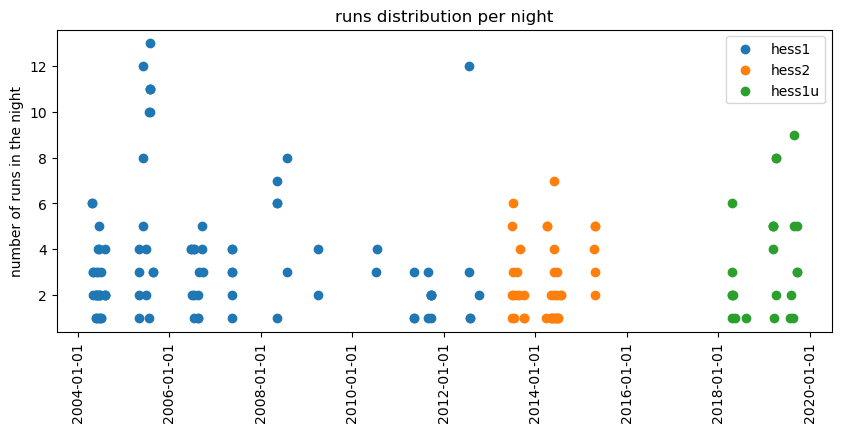

In [3]:
fig, ax = plt.subplots(1,1, figsize=(10, 4), dpi=100)

for i, table in enumerate(full_info):
    list_date = []
    for date in np.unique(table['DATE-OBS']):
        list_date.append([date, int(np.sum(table['DATE-OBS'] == date))])
    list_date = np.asarray(list_date)
    
    x_values = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in list_date[:, 0]]
        
    formatter = mdates.DateFormatter("%Y-%m-%d")    
    ax.xaxis.set_major_formatter(formatter)
    locator = mdates.YearLocator(2)
    ax.xaxis.set_major_locator(locator)

    ax.scatter(x_values, list_date[:, 1].astype(int), label=hesseras[i])
plt.xticks(rotation=90)
plt.ylabel('number of runs in the night')
plt.title('runs distribution per night')
plt.legend()
plt.show()

# rebinning, after fermi

In [3]:
def get_table(runlist, hessera):
    basedir = f'$FITS_PROD/{hessera}/std_{conf}_fullEnclosure'
    ds = DataStore.from_dir(basedir, f'hdu-index-bg-latest-fov-radec.fits.gz', f'obs-index-bg-latest-fov-radec.fits.gz')
    obs_table = ds.obs_table

    mask = [True if obsid in runlist else False for obsid in obs_table['OBS_ID']]
    obs_table=obs_table[mask]
    return obs_table

In [4]:
full_info = []
for hessera in hesseras:
    name_afterFermi = 'v1'
    if hessera == 'hess1':
        for idx in range(3):
            runlist = np.loadtxt(f'runlist_{hessera}_{idx}.txt')
            full_info.append(get_table(runlist, hessera))
    else:
        runlist = np.loadtxt(f'runlist_{hessera}.txt')
        full_info.append(get_table(runlist, hessera))

In [6]:
day = '27'
month = '10'
time_label=['2008-2010', '2010-2012', '2012-2014', '2014-2016', '2016-2018', '2018-2020', '2020-2022']
N_bin_met = 8

colors = ['darkblue', 'C0', 'C1', 'C2', 'C5']

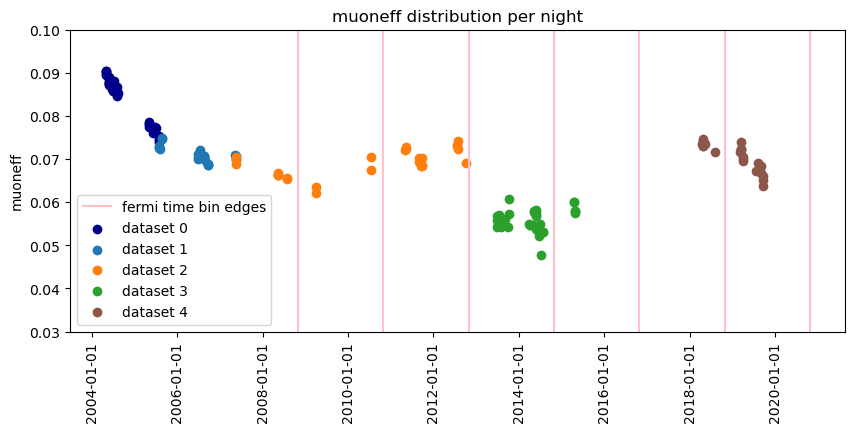

In [7]:
fig, ax = plt.subplots(1,1, figsize=(10, 4), dpi=100)

for i, table in enumerate(full_info):
    list_date = []
    for date in np.unique(table['DATE-OBS']):
        list_date.append([date, table['MUONEFF'][np.where(table['DATE-OBS'] == date)[0][0]]])
    list_date = np.asarray(list_date)
    
    x_values = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in list_date[:, 0]]
        
    formatter = mdates.DateFormatter("%Y-%m-%d")    
    ax.xaxis.set_major_formatter(formatter)
    locator = mdates.YearLocator(2)
    ax.xaxis.set_major_locator(locator)

    ax.scatter(x_values, list_date[:, 1].astype(float), label=f'dataset {i}', color=colors[i])
    
for n_bin_met in range(N_bin_met-1):
    if n_bin_met == N_bin_met-1:
        edge=datetime.datetime.strptime(f'{time_label[n_bin_met][5:]}-{month}-{day}',"%Y-%m-%d").date()
    else:
        edge=datetime.datetime.strptime(f'{time_label[n_bin_met][:4]}-{month}-{day}',"%Y-%m-%d").date()
    label = None
    if n_bin_met == 0:
        label='fermi time bin edges'
    ax.axvline(edge, color='pink', label=label)
    
plt.xticks(rotation=90)
plt.ylabel('muoneff')
plt.ylim(0.03,0.1)
plt.title('muoneff distribution per night')
plt.legend()
plt.show()

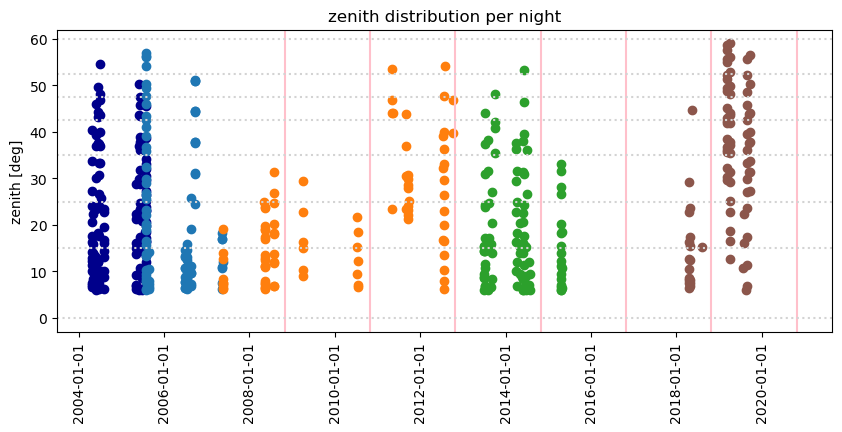

In [8]:
fig, ax = plt.subplots(1,1, figsize=(10, 4), dpi=100)

for i, table in enumerate(full_info):
    list_date = []
    for j in range(len(table)):
        list_date.append([table['DATE-OBS'][j], table['ZEN_PNT'][j]])
    list_date = np.asarray(list_date)
    
    x_values = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in list_date[:, 0]]
        
    formatter = mdates.DateFormatter("%Y-%m-%d")    
    ax.xaxis.set_major_formatter(formatter)
    locator = mdates.YearLocator(2)
    ax.xaxis.set_major_locator(locator)

    ax.scatter(x_values, list_date[:, 1].astype(float), label=f'dataset {i}', color=colors[i])
    
for n_bin_met in range(N_bin_met-1):
    if n_bin_met == N_bin_met-1:
        edge=datetime.datetime.strptime(f'{time_label[n_bin_met][5:]}-{month}-{day}',"%Y-%m-%d").date()
    else:
        edge=datetime.datetime.strptime(f'{time_label[n_bin_met][:4]}-{month}-{day}',"%Y-%m-%d").date()
    label = None
    if n_bin_met == 0:
        label='fermi time bin edges'
    ax.axvline(edge, color='pink', label=label)
    
zen_bins=cfg['zen_bins']
for zen in zen_bins:
    ax.axhline(zen, ls=':', color='lightgray')
plt.xticks(rotation=90)
plt.ylabel('zenith [deg]')
plt.title('zenith distribution per night')
#plt.legend()
plt.show()

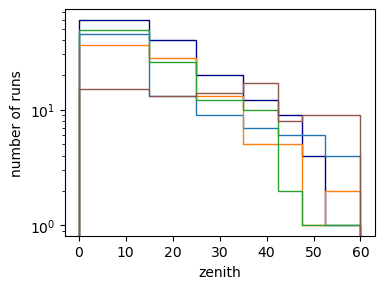

In [13]:
fig, ax = plt.subplots(1,1, figsize=(4, 3), dpi=100)
zen_bins=cfg['zen_bins']
for i, table in enumerate(full_info):
    ax.hist(table['ZEN_PNT'], histtype='step', bins = zen_bins, color=colors[i])
ax.set_xlabel('zenith')
ax.set_ylabel('number of runs')
ax.set_yscale('log')

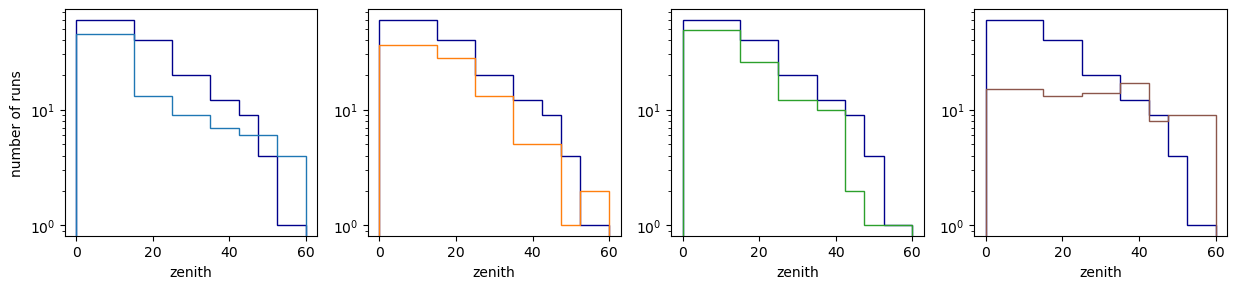

In [16]:
color_list = ['darkblue', 'C0', 'C1', 'C2', 'C5']

fig, ax = plt.subplots(1,4, figsize=(15, 3), dpi=100)

zen_bins=cfg['zen_bins']
for i, table in enumerate(full_info):
    if i!=0:
        ax[i-1].hist(full_info[0]['ZEN_PNT'], histtype='step', bins = zen_bins, color=colors[0])
        ax[i-1].hist(table['ZEN_PNT'], histtype='step', bins = zen_bins, color=colors[i])
        if i==1:
            ax[i-1].set_ylabel('number of runs')
        ax[i-1].set_xlabel('zenith')
        ax[i-1].set_yscale('log')
plt.show()

### normalization distribution

In [23]:
names = []

for hessera in hesseras:
    muoneff_flag= True
    edisp = True
    name_afterFermi = 'v1'  
    
    if hessera =='hess1u':
        muoneff_flag=False
    
    if hessera == 'hess1':
        for idx in range(3):
            name = f'20220702_{hessera}_muoneff{muoneff_flag}_edisp{edisp}_afterFermi{name_afterFermi}_{idx}'
            names.append(name)
    else:
        name = f'20220702_{hessera}_muoneff{muoneff_flag}_edisp{edisp}'
        names.append(name)

In [24]:
norm_tilt_list = []
for name in names:
    norm_tilt_list.append(np.loadtxt(f'norm_tilt{name[8:]}.txt'))

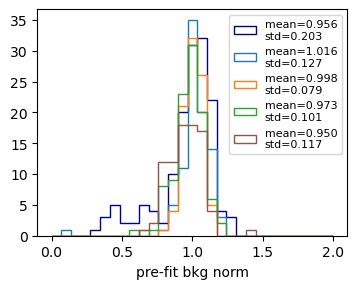

In [35]:
fig, ax = plt.subplots(1,1, figsize=(4, 3), dpi=100)

bins = np.linspace(0,2,30)
for idx, norm_tilt in enumerate(norm_tilt_list):
    data= norm_tilt[:, 1]
    ax.hist(data, color=colors[idx], histtype='step', label=f'mean={np.mean(data):.3f}\nstd={np.std(data):.3f}', bins=bins)
ax.set_xlabel('pre-fit bkg norm')
plt.legend(fontsize=8)

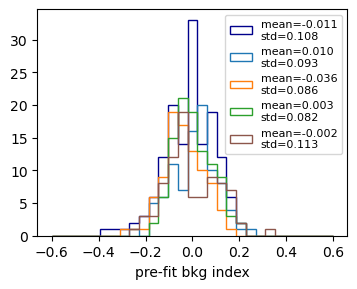

In [36]:
fig, ax = plt.subplots(1,1, figsize=(4, 3), dpi=100)

bins = np.linspace(-0.6,0.6,30)
for idx, norm_tilt in enumerate(norm_tilt_list):
    data= norm_tilt[:, 2]
    ax.hist(data, color=colors[idx], histtype='step', label=f'mean={np.mean(data):.3f}\nstd={np.std(data):.3f}', bins=bins)
ax.set_xlabel('pre-fit bkg index')
plt.legend(fontsize=8)